# Chapter 6. Other Issues

## 6.1 매개변수 갱신 - 최적화

6.1절에 대한 자세한 설명은 아래의 Andrew Ng 교수의 Coursera 강의 동영상을 참조하세요:
- https://www.youtube.com/watch?v=lAq96T8FkTw&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=17 (C2W2L03)
- ...
- https://www.youtube.com/watch?v=JXQT_vxqwIs&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=22 (C2W2L08)

### 6.1.2 확률적 경사 하강법 (SGD)

- 전체 데이터를 이용하지 않고 랜덤하게 선택된 일부 데이터만 이용해서 경사하강법을 적용

$$ \textbf{W} \leftarrow \textbf{W} - \eta \frac{\partial L}{\partial \textbf{W}} $$

SGD 클래스 구현:

In [35]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

SGD 클래스를 사용한 신경망 매개변수 학습:

    network = TwoLayerNet(...)
    optimizer = SGD()  # optimizer 지정 

    for i in range(10000):
        ...
        x_batch, t_batch = get_mini_batch(...)    # 미니배치
        grads = network.gradient(x_batch, t_batch)
        params = network.params
        optimizer.update(params, grads)  # W = W - \eta \partial L / \partial W
        ...

**실습문제**: 클래스 SGD를 이용하여 5.7절의 TwoLayerNet 구현을 수정하시오.

In [5]:
ㅁㄴㅇㄻㄴㅇㄹㅁㄴㅇㄻㄴㅇㄹ

### 6.1.3 SGD의 단점

<img src="e 6.2.png" width="150">

<img src="fig 6-1.png" width="800">

<img src="fig 6-3.png" width="400">

### 6.1.4 모멘텀 (Momentum)

<img src="e 6.3.png" width="130">
<img src="e 6.4.png" width="100">
where $\textbf{v}$ = velocity

Momentum 클래스 구현:

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

<img src="fig 6-5.png" width="400">

### 6.1.5 AdaGrad

- 학습률 감소 (learning rate decay)

<img src="e 6.5.png" width="130">
<img src="e 6.6.png" width="130">

AdaGrad 클래스 구현:

In [ ]:
#동그라미점은 element끼리 곱
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

<img src="fig 6-6.png" width="400">

AdaGrad의 단점:
- 과거의 기울기를 제곱하여 계속 더하다 보면, 학습을 진행할수록 갱신 강도가 약해져서, 무한히 계속 학습하면 갱신량이 0이 되어 학습이 되지 않음

### RMSProp

- 과거의 모든 기울기를 균일하게 더하는 것이 아니라, 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영함
- 지수이동평균(EMA: Exponential Moving Average)으로 과거 기울기의 반영 규모를 기하급수적으로 감소시킴

In [ ]:
class RMSprop:
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6.1.6 Adam

- Momentum + RMSProp

Adam 클래스 구현:

In [ ]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

<img src="fig 6-7.png" width="400">

### 6.1.7 optimizer_compare_naive.py

<img src="e 6.2.png" width="150">

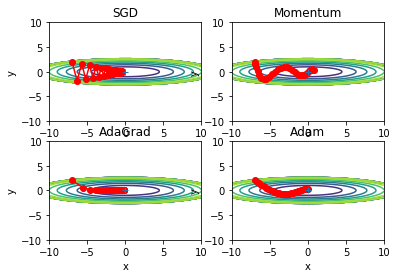

In [9]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.1.8 optimizer_compare_mnist.py

- MNIST 데이터셋에 대한 학습 진도 비교

===========iteration:0===========
SGD:2.50190524669657
Momentum:2.427002003445373
AdaGrad:2.0318323272272103
Adam:2.2615674932179255
===========iteration:400===========
SGD:0.45536330190685237
Momentum:0.2131908244260366
AdaGrad:0.1222401501626593
Adam:0.19064702091522379
===========iteration:800===========
SGD:0.30121901316206934
Momentum:0.15262720387103354
AdaGrad:0.07249860263729863
Adam:0.09346228005320689
===========iteration:1200===========
SGD:0.21617329626643944
Momentum:0.06620911988028849
AdaGrad:0.030070243380751864
Adam:0.06253258580513321
===========iteration:1600===========
SGD:0.1859472743921224
Momentum:0.06508509326110032
AdaGrad:0.020926147318426944
Adam:0.05266102977746152


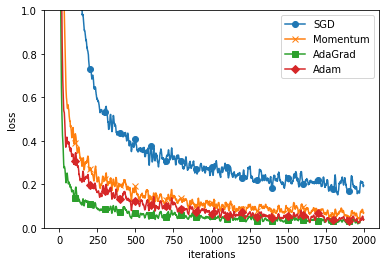

In [9]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 400 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


## 6.2 가중치의 초깃값

6.2절에 대한 자세한 설명은 아래의 Andrew Ng 교수의 Coursera 강의 동영상을 참조하세요:
- https://www.youtube.com/watch?v=FDCfw-YqWTE&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=9 (C2W1L09)
- ...
- https://www.youtube.com/watch?v=s2coXdufOzE&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=11 (C2W1L11)

### 6.2.1 초깃값을 0으로 하면 (가중치를 균일한 값으로 설정하면) ?

- 오차역전파에서 모든 가중치가 똑같이 갱신됨

### 6.2.2 은닉층의 활성화값 분포

**실험1**: 가중치 초깃값에 따른 은닉층 활성화값의 변화
- 가중치 표준편차 : 1

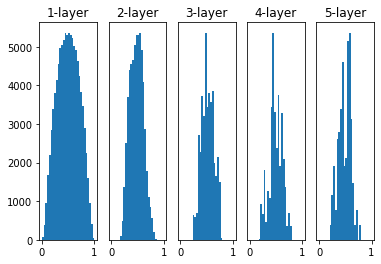

In [2]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 5개의 은닉층
activations = {}  # 이곳에 활성화 결과(활성화값)을 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))     
    
plt.show()

**실험1 결과**: 각 층의 활성화값들이 0과 1에 치우쳐 분포됨
- 미분은 0에 다가감
- 기울기 소실(gradient vanishing)

<img src="fig 6-10.png" width="600">

**실험2**: 
- 가중치 표준편차 : 0.01

**실험2 결과**: 각 층의 활성화값들이 0.5 부근에 집중
- 표현력 제한

<img src="fig 6-11.png" width="600">

**실험3**: Xavier 초깃값
- 가중치 표준편차 : $\frac{1}{\sqrt{n}}$, where $n$: 앞 층의 노드 수

<img src="fig 6-12.png" width="400">

**실험3 결과**: 층이 깊어지면서 형태가 다소 일그러지지만, 앞의 방식 보다는 넓게 분포됨

<img src="fig 6-13.png" width="600">

**실습문제**: tanh() 활성화 함수에 대해 위의 실험1~3을 진행하시오.

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

He 초깃값 : 가중치 초깃값으로 표준편차가 $\frac{2}{\sqrt{n}}$인 정규분포를 사용, where $n$: 앞 층의 노드 수

**실험**: 표준편차가 0.01인 정규분포, Xavier 초깃값, He 초깃값일 때의 활성화값 분포

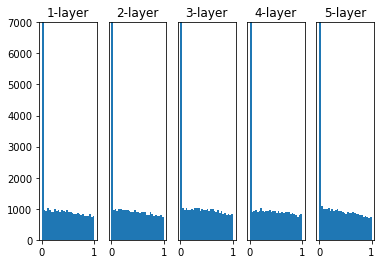

In [12]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 5개의 은닉층
activations = {}  # 이곳에 활성화 결과(활성화값)을 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)
    # z = sigmoid(a)
    z = ReLU(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
    
plt.show()

**실험 결과**:

<img src="fig 6-14.png" width="500">

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.3024798201614836
Xavier:2.3133665094510105
He:2.271313665536261
===========iteration:200===========
std=0.01:2.3033987862233154
Xavier:2.1615539068307625
He:0.7624063254453206
===========iteration:400===========
std=0.01:2.3042462813805162
Xavier:1.8097948237191979
He:0.42454170187704043
===========iteration:600===========
std=0.01:2.3022769745394505
Xavier:0.9730072262665429
He:0.4828812127982397
===========iteration:800===========
std=0.01:2.2970350151733743
Xavier:0.5044152424835414
He:0.24971501811066377
===========iteration:1000===========
std=0.01:2.297505099644773
Xavier:0.37303144215444717
He:0.1682678811532992
===========iteration:1200===========
std=0.01:2.31216224544711
Xavier:0.4964198033089437
He:0.29698229258080655
===========iteration:1400===========
std=0.01:2.3020477608050545
Xavier:0.41733408114116044
He:0.2959883829144875
===========iteration:1600===========
std=0.01:2.2996546357566663
Xavier:0.3540198241203337
He:0.229330

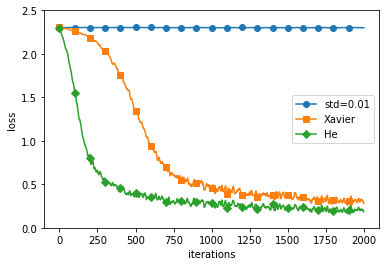

In [8]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 200 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 6.3 배치 정규화 (Batch Normalization)

6.3절에 대한 자세한 설명은 아래의 Andrew Ng 교수의 Coursera 강의 동영상을 참조하세요:
- https://www.youtube.com/watch?v=tNIpEZLv_eg&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=27 (C2W3L04)
- ...
- https://www.youtube.com/watch?v=5qefnAek8OA&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=30 (C2W3L07)

- 각 층의 활성화값 분포를 적당히 퍼지도록 함

배치 정규화의 장점:
- 학습 속도 개선
- 초깃값에 크게 의존하지 않음
- 오버피팅을 억제함

### 6.3.1 배치 정규화 알고리즘

<img src="fig 6-16.png" width="700">

1) 미니배치를 평균이 0, 분산이 1이 되도록 정규화:

<img src="e 6.7.png" width="170">

2) 위의 결과에 확대(scale)와 이동(shift) 변환:

<img src="e 6.8.png" width="100">

BatchNormalization 클래스의 구현:

In [ ]:
class BatchNormalization:

    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv層の場合は4次元、全結合層の場合は2次元  

        # テスト時に使用する平均と分散
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx

### 6.3.2 배치 정규화의 효과

<img src="fig 6-18.png" width="400">

In [14]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient

class MultiLayerNetExtend:
    """拡張版の全結合による多層ニューラルネットワーク
    
    Weiht Decay、Dropout、Batch Normalizationの機能を持つ

    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    weight_decay_lambda : Weight Decay（L2ノルム）の強さ
    use_dropout: Dropoutを使用するかどうか
    dropout_ration : Dropoutの割り合い
    use_batchNorm: Batch Normalizationを使用するかどうか
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0, 
                 use_dropout = False, dropout_ration = 0.5, use_batchnorm=False):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
                
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ration)

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """重みの初期値設定

        Parameters
        ----------
        weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
            'relu'または'he'を指定した場合は「Heの初期値」を設定
            'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x, train_flg=False):
        for key, layer in self.layers.items():
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x, train_flg)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        Y = self.predict(X, train_flg=False)
        Y = np.argmax(Y, axis=1)
        if T.ndim != 1 : T = np.argmax(T, axis=1)

        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy

    def numerical_gradient(self, X, T):
        """勾配を求める（数値微分）

        Parameters
        ----------
        X : 入力データ
        T : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_W = lambda W: self.loss(X, T, train_flg=True)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])
            
            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = numerical_gradient(loss_W, self.params['gamma' + str(idx)])
                grads['beta' + str(idx)] = numerical_gradient(loss_W, self.params['beta' + str(idx)])

        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t, train_flg=True)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

============== 1/16 ==============
============== 2/16 ==============


..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


============== 3/16 ==============
============== 4/16 ==============
============== 5/16 ==============
============== 6/16 ==============
============== 7/16 ==============
============== 8/16 ==============
============== 9/16 ==============
============== 10/16 ==============
============== 11/16 ==============
============== 12/16 ==============
============== 13/16 ==============
============== 14/16 ==============
============== 15/16 ==============
============== 16/16 ==============


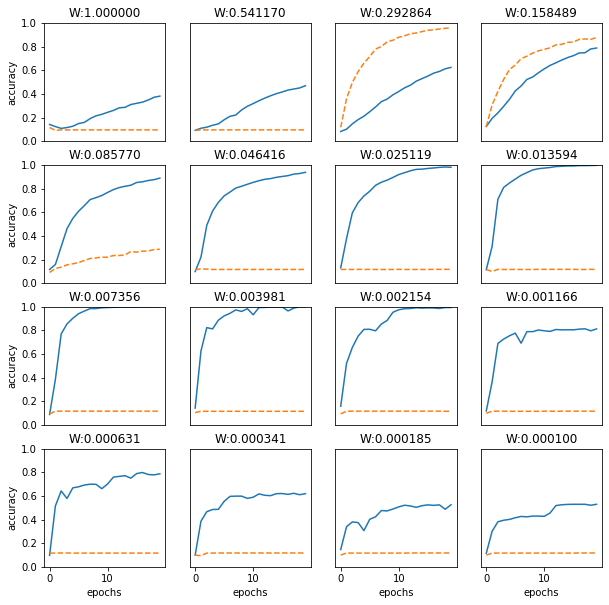

In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            #print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(10, 10))    # 2019/11/09

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    #plt.title("W:" + str(w))
    plt.title("W:{0:.6f}".format(w))    # 2019/11/09
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    #plt.legend(loc='lower right')
    
plt.show()

## 6.4 바른 학습

6.4절에 대한 자세한 설명은 아래의 Andrew Ng 교수의 Coursera 강의 동영상을 참조하세요:
- https://www.youtube.com/watch?v=SjQyLhQIXSM&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=2 (C2W1L02)
- ...
- https://www.youtube.com/watch?v=ARq74QuavAo&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=7 (C2W1L07)

### 6.4.1 오버피팅

- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음

오버피팅 발생 예제:
- MNIST 데이터셋에서 300개만 훈련 데이터로 사용
- 7층 네트워크 (각 층의 뉴런은 100개)

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient

class MultiLayerNet:
    """全結合による多層ニューラルネットワーク

    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    weight_decay_lambda : Weight Decay（L2ノルム）の強さ
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """重みの初期値設定

        Parameters
        ----------
        weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
            'relu'または'he'を指定した場合は「Heの初期値」を設定
            'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        損失関数の値
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads

epoch:0, train acc:0.12333333333333334, test acc:0.1204
epoch:1, train acc:0.12, test acc:0.1208
epoch:2, train acc:0.13333333333333333, test acc:0.1234
epoch:3, train acc:0.14333333333333334, test acc:0.1357
epoch:4, train acc:0.16333333333333333, test acc:0.1402
epoch:5, train acc:0.16333333333333333, test acc:0.1395
epoch:6, train acc:0.18, test acc:0.1552
epoch:7, train acc:0.18666666666666668, test acc:0.1567
epoch:8, train acc:0.19666666666666666, test acc:0.1579
epoch:9, train acc:0.21333333333333335, test acc:0.1723
epoch:10, train acc:0.24333333333333335, test acc:0.1843
epoch:11, train acc:0.27, test acc:0.1946
epoch:12, train acc:0.2833333333333333, test acc:0.2107
epoch:13, train acc:0.31333333333333335, test acc:0.2228
epoch:14, train acc:0.3466666666666667, test acc:0.2559
epoch:15, train acc:0.37666666666666665, test acc:0.277
epoch:16, train acc:0.4266666666666667, test acc:0.3051
epoch:17, train acc:0.43, test acc:0.309
epoch:18, train acc:0.45666666666666667, test acc

epoch:161, train acc:1.0, test acc:0.7381
epoch:162, train acc:1.0, test acc:0.7362
epoch:163, train acc:1.0, test acc:0.738
epoch:164, train acc:1.0, test acc:0.7359
epoch:165, train acc:1.0, test acc:0.7352
epoch:166, train acc:1.0, test acc:0.7351
epoch:167, train acc:1.0, test acc:0.7368
epoch:168, train acc:1.0, test acc:0.7361
epoch:169, train acc:1.0, test acc:0.7353
epoch:170, train acc:1.0, test acc:0.7367
epoch:171, train acc:1.0, test acc:0.7346
epoch:172, train acc:1.0, test acc:0.735
epoch:173, train acc:1.0, test acc:0.7367
epoch:174, train acc:1.0, test acc:0.7369
epoch:175, train acc:1.0, test acc:0.7362
epoch:176, train acc:1.0, test acc:0.7363
epoch:177, train acc:1.0, test acc:0.7354
epoch:178, train acc:1.0, test acc:0.7377
epoch:179, train acc:1.0, test acc:0.7364
epoch:180, train acc:1.0, test acc:0.7366
epoch:181, train acc:1.0, test acc:0.7379
epoch:182, train acc:1.0, test acc:0.7383
epoch:183, train acc:1.0, test acc:0.7376
epoch:184, train acc:1.0, test acc:0

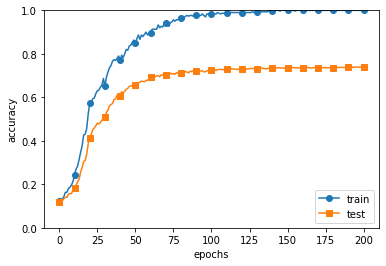

In [15]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0           # weight decay를 안함
#weight_decay_lambda = 0.1        # weight decay를 함
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.2 가중치 감소

- 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많음
- 신경망 학습의 목적은 손실함수의 값을 줄이는 것
- 가중치의 L2 Norm을 손실함수에 더하면 가중치가 커지는 것을 억제할 수 있음

**L2 Regularization**:
$$L(\textbf{W,b}) = CEE + \frac{1}{2}\lambda\textbf{W}^2$$
=>
$$\frac{\partial L}{\partial\textbf{W}} = \frac{\partial CEE}{\partial\textbf{W}} + \lambda\textbf{W}$$

### 6.4.3 Dropout

- 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제하면서 학습
- 시험 때는 모든 뉴런에 신호를 전달, 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력

<img src="fig 6-22.png" width="500">

Dropout 클래스 구현:

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

MNIST를 이용한 훈련 및 시험:

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient

class MultiLayerNetExtend:
    """拡張版の全結合による多層ニューラルネットワーク
    
    Weiht Decay、Dropout、Batch Normalizationの機能を持つ

    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    weight_decay_lambda : Weight Decay（L2ノルム）の強さ
    use_dropout: Dropoutを使用するかどうか
    dropout_ration : Dropoutの割り合い
    use_batchNorm: Batch Normalizationを使用するかどうか
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0, 
                 use_dropout = False, dropout_ration = 0.5, use_batchnorm=False):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
                
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ration)

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """重みの初期値設定

        Parameters
        ----------
        weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
            'relu'または'he'を指定した場合は「Heの初期値」を設定
            'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x, train_flg=False):
        for key, layer in self.layers.items():
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x, train_flg)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        Y = self.predict(X, train_flg=False)
        Y = np.argmax(Y, axis=1)
        if T.ndim != 1 : T = np.argmax(T, axis=1)

        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy

    def numerical_gradient(self, X, T):
        """勾配を求める（数値微分）

        Parameters
        ----------
        X : 入力データ
        T : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_W = lambda W: self.loss(X, T, train_flg=True)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])
            
            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = numerical_gradient(loss_W, self.params['gamma' + str(idx)])
                grads['beta' + str(idx)] = numerical_gradient(loss_W, self.params['beta' + str(idx)])

        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t, train_flg=True)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.optimizer import *

class Trainer:
    """ニューラルネットの訓練を行うクラス
    """
    def __init__(self, network, x_train, t_train, x_test, t_test,
                 epochs=20, mini_batch_size=100,
                 optimizer='SGD', optimizer_param={'lr':0.01}, 
                 evaluate_sample_num_per_epoch=None, verbose=True):
        self.network = network
        self.verbose = verbose
        self.x_train = x_train
        self.t_train = t_train
        self.x_test = x_test
        self.t_test = t_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch

        # optimizer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
        
        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0
        
        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]
        
        grads = self.network.gradient(x_batch, t_batch)
        self.optimizer.update(self.network.params, grads)
        
        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("train loss:" + str(loss))
        
        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1
            
            x_train_sample, t_train_sample = self.x_train, self.t_train
            x_test_sample, t_test_sample = self.x_test, self.t_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
                
            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)

            if self.verbose: print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))

train loss:2.3230752971520685
=== epoch:1, train acc:0.10333333333333333, test acc:0.0848 ===
train loss:2.3745936477467047
train loss:2.3475142661034174
train loss:2.343134976341223
=== epoch:2, train acc:0.1, test acc:0.0859 ===
train loss:2.3536670477729755
train loss:2.319894604451493
train loss:2.3015221373554122
=== epoch:3, train acc:0.10666666666666667, test acc:0.0874 ===
train loss:2.320696890569621
train loss:2.3259132998461327
train loss:2.316999976134949
=== epoch:4, train acc:0.10333333333333333, test acc:0.0858 ===
train loss:2.319941564872784
train loss:2.3288221505058724
train loss:2.30782669312142
=== epoch:5, train acc:0.1, test acc:0.087 ===
train loss:2.3349608537636644
train loss:2.293046950771566
train loss:2.313550827701031
=== epoch:6, train acc:0.09666666666666666, test acc:0.0845 ===
train loss:2.30944674918856
train loss:2.3071011380249873
train loss:2.329910083299033
=== epoch:7, train acc:0.09666666666666666, test acc:0.0839 ===
train loss:2.28486237806808

=== epoch:57, train acc:0.4066666666666667, test acc:0.3221 ===
train loss:2.1171548328909413
train loss:2.1395264200084467
train loss:2.098370778931433
=== epoch:58, train acc:0.4033333333333333, test acc:0.3223 ===
train loss:2.1238396675875544
train loss:2.1049451958709593
train loss:2.116200879356997
=== epoch:59, train acc:0.41, test acc:0.3243 ===
train loss:2.1275584065027138
train loss:2.049147497547187
train loss:2.081648571148445
=== epoch:60, train acc:0.4033333333333333, test acc:0.3255 ===
train loss:2.0756278548710863
train loss:2.1034897202183185
train loss:2.0676669428628514
=== epoch:61, train acc:0.41333333333333333, test acc:0.326 ===
train loss:2.0868696231774773
train loss:2.0840216993332636
train loss:2.033181734422203
=== epoch:62, train acc:0.41, test acc:0.326 ===
train loss:2.085575635062842
train loss:2.059716650046218
train loss:2.073258357409169
=== epoch:63, train acc:0.41333333333333333, test acc:0.3274 ===
train loss:2.029343392104354
train loss:2.081858

=== epoch:113, train acc:0.6, test acc:0.4969 ===
train loss:1.5793212099672567
train loss:1.5273867473884974
train loss:1.4409758296747506
=== epoch:114, train acc:0.6166666666666667, test acc:0.5014 ===
train loss:1.4719617357295092
train loss:1.52672409948201
train loss:1.4933073102681444
=== epoch:115, train acc:0.6133333333333333, test acc:0.493 ===
train loss:1.4075413665998184
train loss:1.4845828718087473
train loss:1.4755913946954449
=== epoch:116, train acc:0.6, test acc:0.4929 ===
train loss:1.5274618174093668
train loss:1.4430728593252258
train loss:1.3563274626542685
=== epoch:117, train acc:0.61, test acc:0.4946 ===
train loss:1.401732894535698
train loss:1.4389048486968803
train loss:1.4567563410756148
=== epoch:118, train acc:0.6, test acc:0.4948 ===
train loss:1.3930850111375832
train loss:1.3998437031903606
train loss:1.2417162837882725
=== epoch:119, train acc:0.6, test acc:0.4954 ===
train loss:1.4535359766545983
train loss:1.3808660032790225
train loss:1.3853309721

=== epoch:169, train acc:0.79, test acc:0.6163 ===
train loss:0.8329592787950197
train loss:0.8447428524009483
train loss:0.8813267544755502
=== epoch:170, train acc:0.7966666666666666, test acc:0.6163 ===
train loss:0.875285573871324
train loss:0.9510818532593706
train loss:0.9034793875243828
=== epoch:171, train acc:0.7866666666666666, test acc:0.6183 ===
train loss:0.9049716563432646
train loss:0.8451395187870666
train loss:0.8018049629608032
=== epoch:172, train acc:0.7933333333333333, test acc:0.6251 ===
train loss:0.7657803762138146
train loss:0.7402757250724844
train loss:0.8135799367038251
=== epoch:173, train acc:0.8033333333333333, test acc:0.6281 ===
train loss:0.6976069221054482
train loss:0.9116268932658761
train loss:0.8683764701609258
=== epoch:174, train acc:0.7966666666666666, test acc:0.6273 ===
train loss:0.7797556000705047
train loss:0.8121605602068581
train loss:0.7487507306843335
=== epoch:175, train acc:0.79, test acc:0.6256 ===
train loss:0.6591425133808264
trai

=== epoch:224, train acc:0.8466666666666667, test acc:0.6643 ===
train loss:0.5378719281379826
train loss:0.559567616520853
train loss:0.6223649001343272
=== epoch:225, train acc:0.85, test acc:0.6669 ===
train loss:0.5539405095956924
train loss:0.5699524529089021
train loss:0.5473817294143797
=== epoch:226, train acc:0.8566666666666667, test acc:0.6698 ===
train loss:0.4566054361602264
train loss:0.5180718858197844
train loss:0.5567849334369149
=== epoch:227, train acc:0.8466666666666667, test acc:0.6691 ===
train loss:0.5379259158358519
train loss:0.46431818200241465
train loss:0.6314462577879931
=== epoch:228, train acc:0.8566666666666667, test acc:0.6719 ===
train loss:0.5532759618570064
train loss:0.524420238370528
train loss:0.6653253844924429
=== epoch:229, train acc:0.8466666666666667, test acc:0.6671 ===
train loss:0.5530826487076628
train loss:0.4860211460566358
train loss:0.45129576641646485
=== epoch:230, train acc:0.85, test acc:0.6738 ===
train loss:0.48818460881649445
tr

=== epoch:279, train acc:0.9133333333333333, test acc:0.7068 ===
train loss:0.36815056871278967
train loss:0.39291309081704573
train loss:0.27550707594515517
=== epoch:280, train acc:0.9166666666666666, test acc:0.7105 ===
train loss:0.2928378455925245
train loss:0.34103884760575476
train loss:0.2776097872264163
=== epoch:281, train acc:0.9133333333333333, test acc:0.7101 ===
train loss:0.319056533087119
train loss:0.2373795503821215
train loss:0.2948377500846662
=== epoch:282, train acc:0.91, test acc:0.7078 ===
train loss:0.3005677784774311
train loss:0.29923337613095663
train loss:0.28451324840133285
=== epoch:283, train acc:0.9033333333333333, test acc:0.7019 ===
train loss:0.33214393080566446
train loss:0.2910851884868431
train loss:0.2864151010011449
=== epoch:284, train acc:0.9166666666666666, test acc:0.7059 ===
train loss:0.2562872075954722
train loss:0.3155095098283833
train loss:0.2953006411636438
=== epoch:285, train acc:0.92, test acc:0.7015 ===
train loss:0.40204611395923

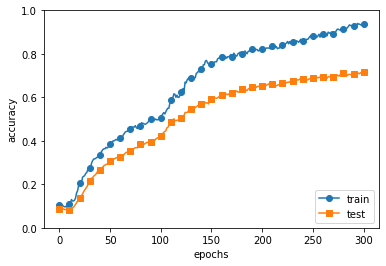

In [4]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
#from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
                  #optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=False)    
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

<img src="fig 6-23.png" width="700">